# User guide and example for the Landlab threshold_eroder component

This notebook provides a brief introduction and user's guide for the threshold eroder component for landscape evolution modeling. 

Threshold eroder that cuts off slopes at a given threshold slope (Sc) and assumes material to dissolve away
with $$S(S>Sc) = Sc$$
where *S* is the topographic slope and *Sc* represents a set threshold slope        

## Threshold eroder with regular grid


In [1]:
import numpy as np
from landlab import RasterModelGrid
from landlab.components import ThresholdEroder,PriorityFloodFlowRouter

mg = RasterModelGrid((5, 5))
mg.set_closed_boundaries_at_grid_edges(False, False, False, False)
z = np.array([0., 0., 0., 0., 0.,
              0., 1., 1., 1., 0.,
              0., 1., 10., 1., 0.,
              0., 1., 1., 1., 0.,
             0., 0., 0., 0., 0.])
_ = mg.add_field("topographic__elevation", z, at="node")

#Instantiate Flow director (steepest slope type) and Threshold Eroder
fdir = PriorityFloodFlowRouter(mg)
th_ero = ThresholdEroder(
     mg,
    slope_crit=0.6)

# Run the components for ten short timepsteps
for t in range(2):
    fdir.run_one_step()
    th_ero.run_one_step()

# Check final topography

np.allclose(
    mg.at_node['topographic__elevation'],
    np.array([ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0.6,  0.6 ,  0.6,  0. ,  0. ,
            0.6,  1.2,  0.6,  0. ,  0. ,  0.6,  0.6 ,  0.6,  0. ,  0. ,  0. ,
            0. ,  0. ,  0. ])
    )

True

## Threshold eroder with regular grid using a bedrock and soil field


In [2]:
mg = RasterModelGrid((5, 5))
mg.set_closed_boundaries_at_grid_edges(False, False, False, False)
z = np.array([0., 0., 0., 0., 0.,
              0., 1., 1., 1., 0.,
              0., 1., 10., 1., 0.,
              0., 1., 1., 1., 0.,
             0., 0., 0., 0., 0.])
topo = mg.add_zeros("topographic__elevation", at="node")
bed = mg.add_field("bedrock__elevation",z,  at="node")
soil = mg.add_ones("soil__depth", at="node")
soil[mg.boundary_nodes]=0
topo[:] = soil+bed

#Instantiate Flow director (steepest slope type) and Threshold Eroder
fdir = PriorityFloodFlowRouter(mg)
th_ero = ThresholdEroder(
     mg,
    slope_crit=0.6)

# Run the components for ten short timepsteps

for t in range(2):
    fdir.run_one_step()
    th_ero.run_one_step()

# Check final topography

np.allclose(
    mg.at_node['topographic__elevation'],
    np.array([ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0.6,  0.6 ,  0.6,  0. ,  0. ,
            0.6,  1.2,  0.6,  0. ,  0. ,  0.6,  0.6 ,  0.6,  0. ,  0. ,  0. ,
            0. ,  0. ,  0. ])
    )

True

## Threshold eroder with hexagonal grid


True

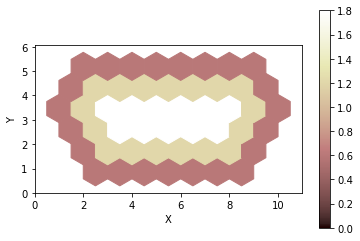

In [3]:
import numpy as np
from landlab import HexModelGrid
from landlab.components import FlowDirectorSteepest, FlowAccumulator, ThresholdEroder
from landlab.plot.imshow import imshow_grid


hmg = HexModelGrid((8,8))

topo = hmg.add_zeros("topographic__elevation", at="node")
topo[hmg.core_nodes]+=100

#Instantiate Flow director (steepest slope type) and Threshold Eroder
fdir = FlowDirectorSteepest(hmg)
fa = FlowAccumulator(hmg)
th_ero = ThresholdEroder(
    hmg,
    slope_crit=0.6)

# Run the components for ten short timepsteps
for t in range(5):
    fdir.run_one_step()
    fa.run_one_step()
    th_ero.run_one_step()
imshow_grid(hmg,'topographic__elevation')

np.allclose(
    hmg.at_node['topographic__elevation'],
    np.array([ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0.6,  0.6,
            0.6,  0.6,  0.6,  0.6,  0.6,  0. ,  0. ,  0.6,  1.2,  1.2,  1.2,
            1.2,  1.2,  1.2,  0.6,  0. ,  0. ,  0.6,  1.2,  1.8,  1.8,  1.8,
            1.8,  1.8,  1.2,  0.6,  0. ,  0. ,  0.6,  1.2,  1.8,  1.8,  1.8,
            1.8,  1.8,  1.8,  1.2,  0.6,  0. ,  0. ,  0.6,  1.2,  1.2,  1.2,
            1.2,  1.2,  1.2,  1.2,  0.6,  0. ,  0. ,  0.6,  0.6,  0.6,  0.6,
            0.6,  0.6,  0.6,  0.6,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
            0. ,  0. ,  0. ])
    )